# Data Exploration

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

I loaded the data from my google drive, I got the dataset from [here](https://gist.github.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c). I call it 'df' as I make it a pandas dataframe

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mtcars.csv')

The code below lists the features, all 12 of them.
The first feature '*model*' is the only categorical feature

In [ ]:
print(list(df.columns))

The code below lists all of the observations and variables

In [ ]:
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Total number of rows: {num_rows + 1}")
print(f"Total Number of columns: {num_cols}")
print(f"Number of columns, excluding categorical variable: {num_cols-1}")

Number of rows: 32
Total number of rows: 33
Total Number of columns: 12
Number of columns, excluding target variable: 11


As seen above, the dataset has
*   32 observations (excluding the heading, which makes it 33)
*   11 variables (excluding the '*model*' variable, which makes it 12)

## Summary Statistics
Summary statistics can be seen below using the pandas **describe()** method to get the central tendancy values for each of the numeric variables

In [ ]:
print(df.describe())

             mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.534679   0.978457   
min    10.400000   4.000000   71.100000   52.000000   2.760000   1.513000   
25%    15.425000   4.000000  120.825000   96.500000   3.080000   2.581250   
50%    19.200000   6.000000  196.300000  123.000000   3.695000   3.325000   
75%    22.800000   8.000000  326.000000  180.000000   3.920000   3.610000   
max    33.900000   8.000000  472.000000  335.000000   4.930000   5.424000   

            qsec         vs         am       gear     carb  
count  32.000000  32.000000  32.000000  32.000000  32.0000  
mean   17.848750   0.437500   0.406250   3.687500   2.8125  
std     1.786943   0.504016   0.498991   0.737804   1.6152  
min    14.500000   0.000000   0.000000   3.000000   1.0000  
2

### Histograms
The numeric features can be plotted as histograms using the **hist()** method provided by matplotlib<br>I use the iloc to print only the numeric columns, exclude *model*

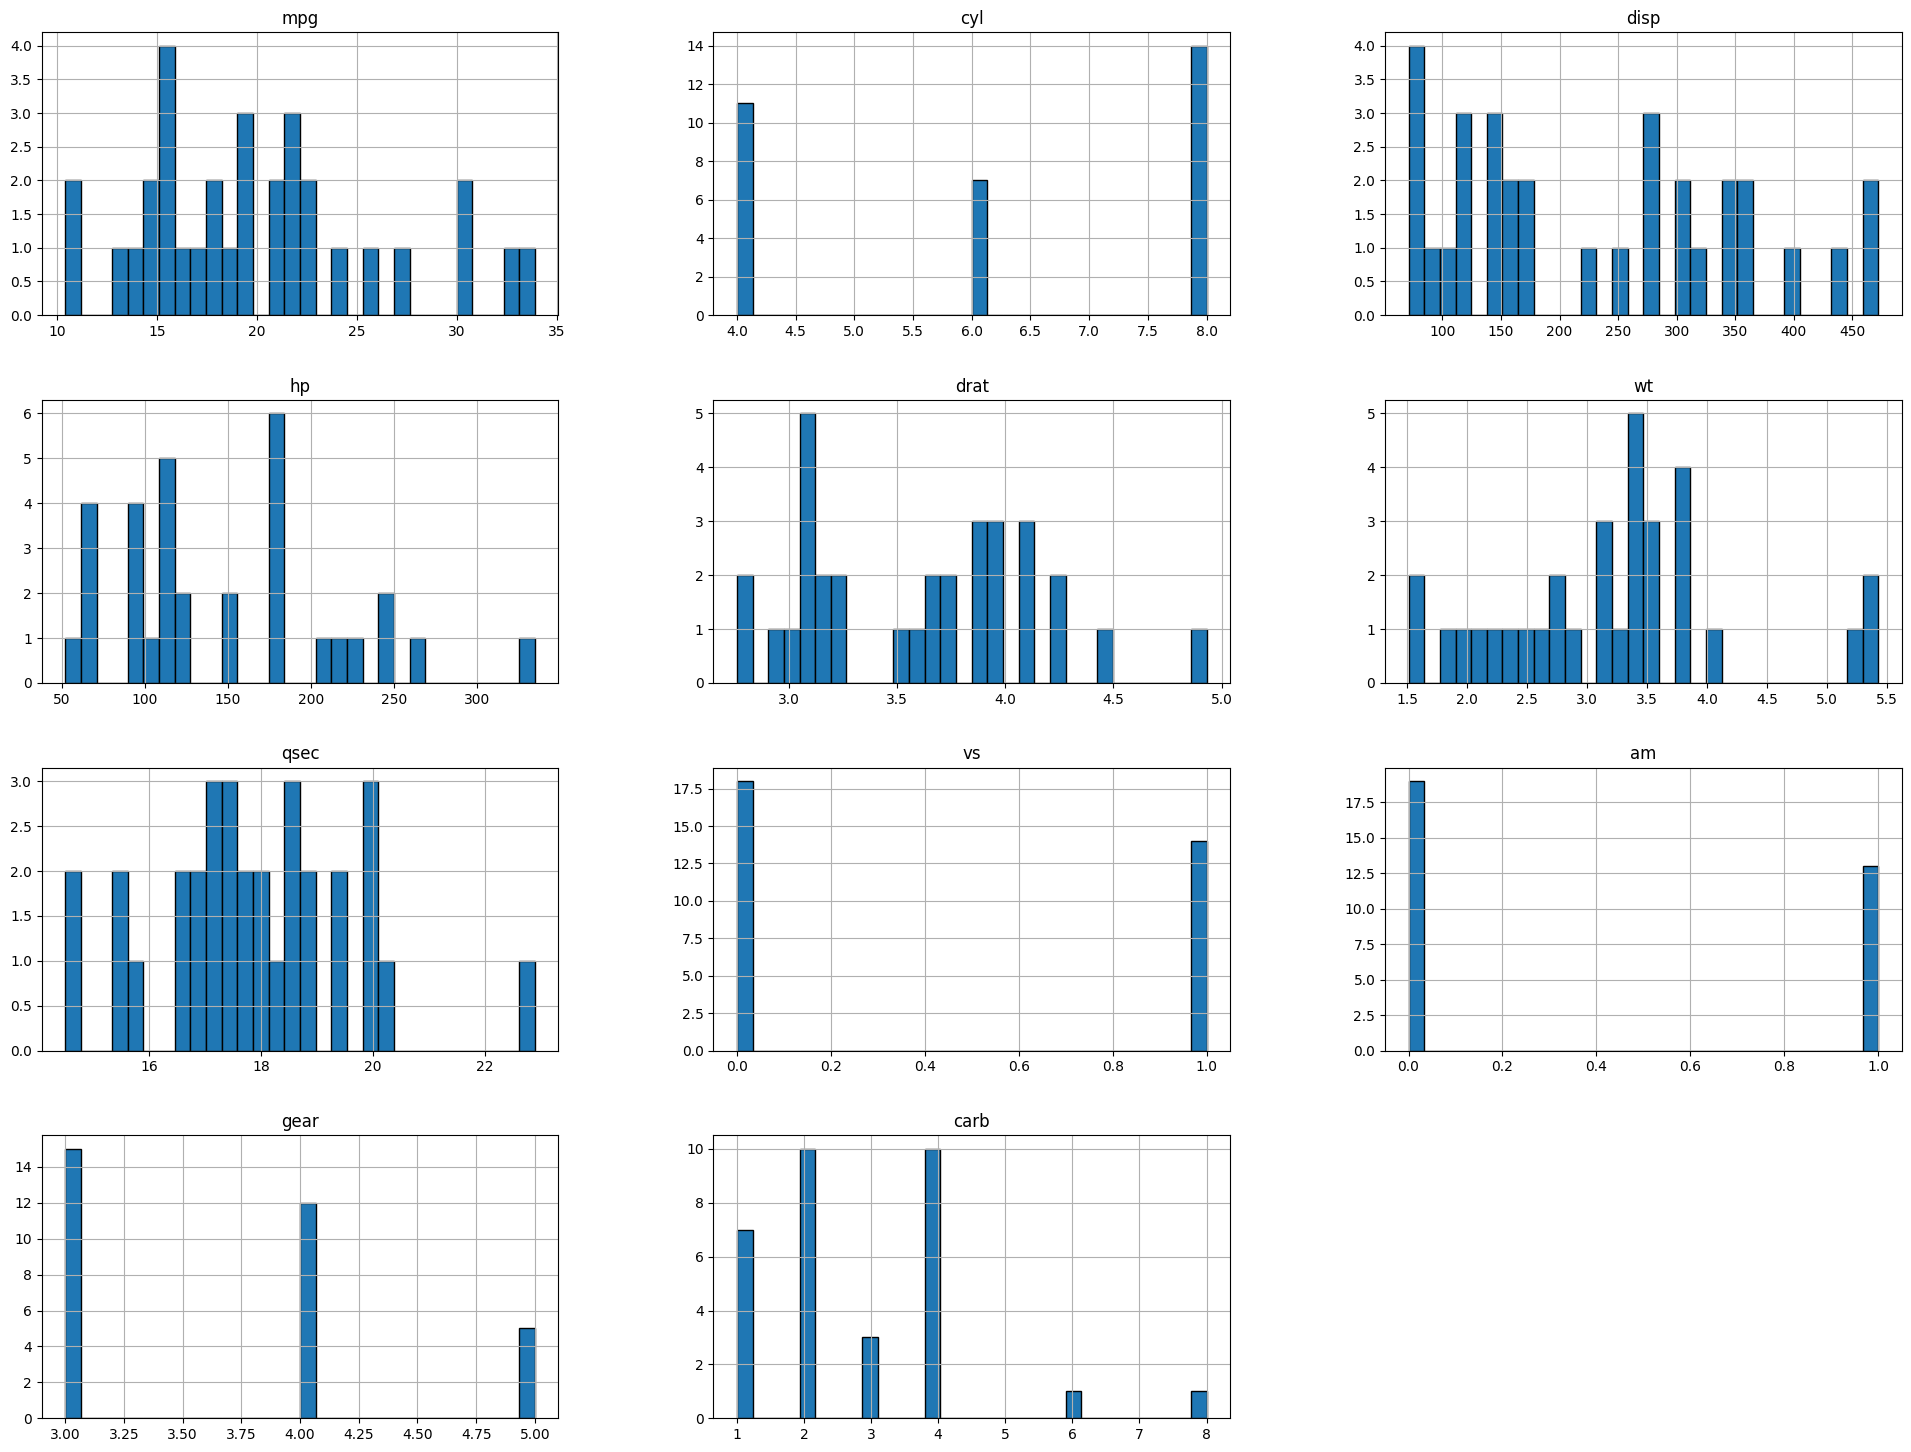

In [ ]:
df.iloc[:, 1:12].hist(bins=30, figsize=(24, 18), edgecolor='black')
plt.ticklabel_format(style='plain')
plt.show()

As seen above, from the histograms we see...

*   **mpg** - right skewed, positive
*   **cyl** - bimodal
*   **disp** - bimodal between 2 peaks
*   **hp** - right skewed
*   **drat** - uniform
*   **wt**- right skewed
*   **qsec**- slightly left skewed
*   **vs** - discreet, 2 peaks
*   **am** - discreet, 2 peajs
*   **gear** - discreet, 3 peaks
*   **carb** - right skewed, postive<br>
I then create an array for all the numeric features, excluding 'model' and 'mpg' (target feature)








In [ ]:
target = 'mpg'
ind_feat = [col for col in df.columns if col not in ['model',target]]
print(ind_feat)

['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']


### Scatter plots
I create a scatter plot using seaborns (sns)  **regplot()** method, which creates a line of best fit

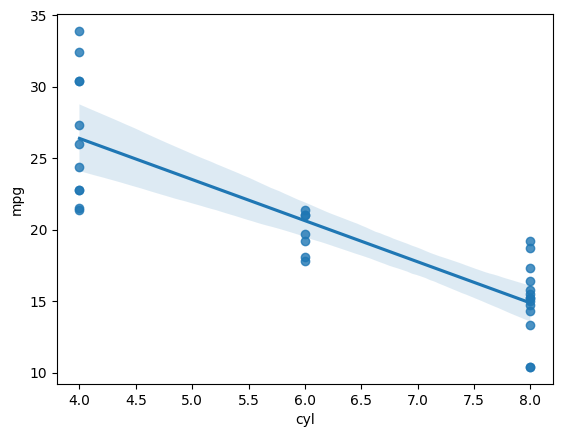

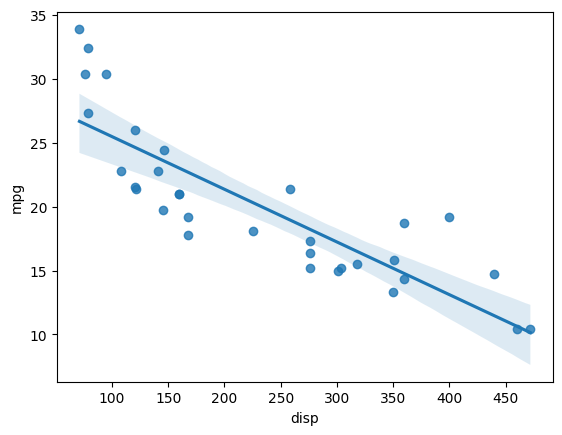

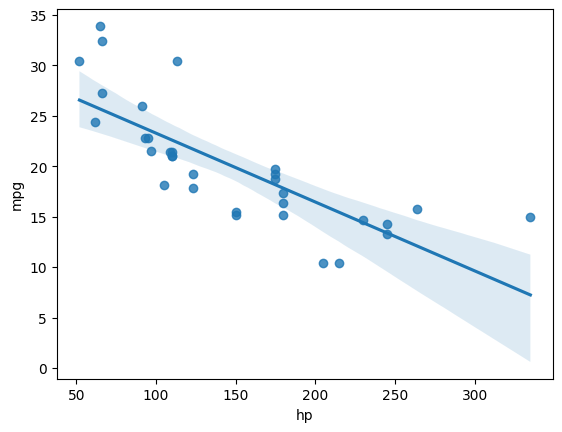

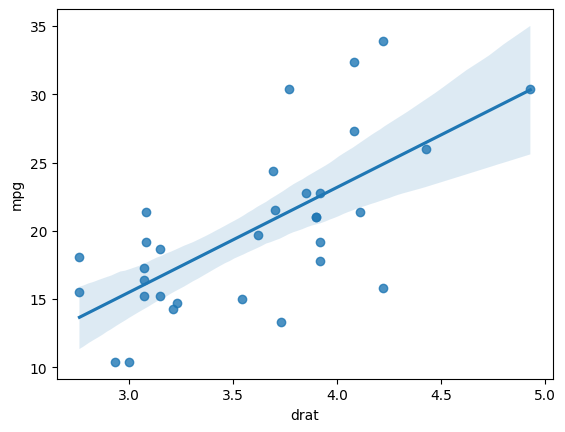

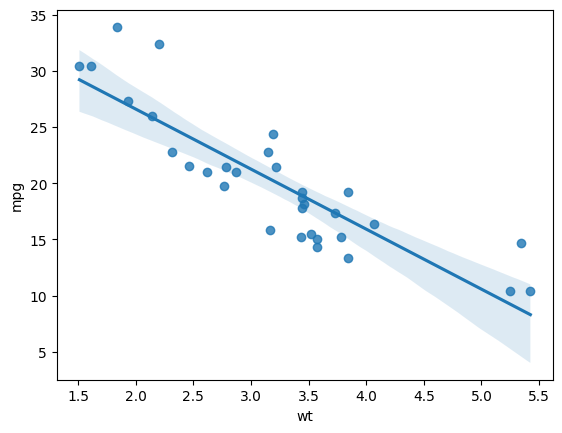

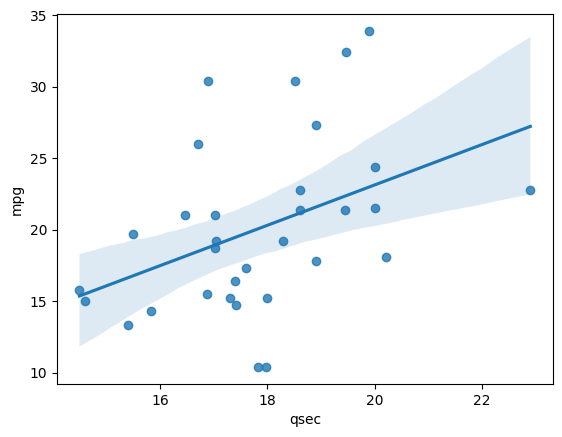

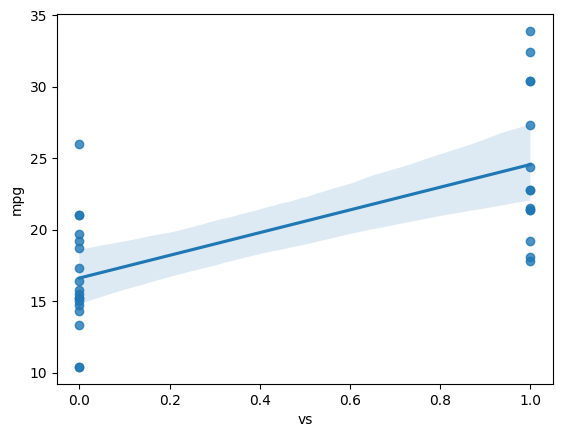

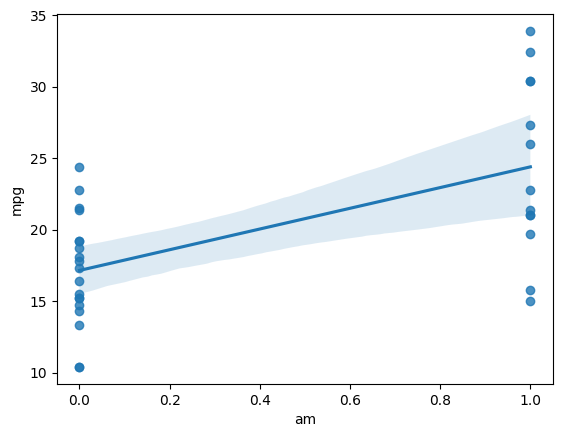

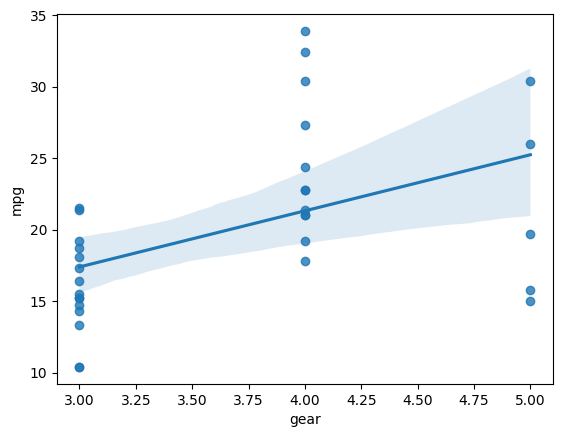

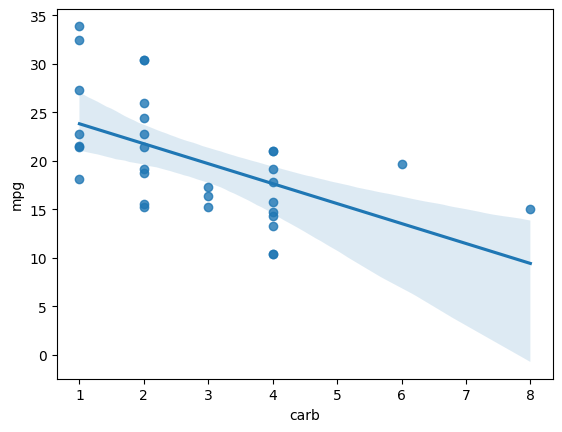

In [ ]:
for feature in ind_feat:
  sns.regplot(x=df[feature], y=df[target])
  plt.show()


From the scatter plots, we can see MPG has...

**Positive correlation with**

*   gear
*   am
*   vs
*   qsec
*   drat


**Negative correlation with**

*   cyl
*   disp
*   hp
*   wt
*   carb









# Simple Linear Regression

### Selecting independent variable

Finding the independant variable which has the strongest relationship with the target variable can be done using linear regression.
We do this using sci-kits learsn 'LinearRegression' class, in the code below I initialise it as 'model'.

LinearRegression has a method **fit()**, taking in the independant and target variable instances, it learns of the relationship between these variables (training the model).
I train each feature against the target variable using fit().<br>Once trained I use the **model.score()** method which calculates the R^2 value for the trained model.<br>R^2, coefficient of determination, tells us how well the independant variable predicted the target variable.

In [ ]:
model = LinearRegression()

for feat in ind_feat:
    x = df[[feat]]  # Independent variable
    y = df[target]  # Target variable
    model.fit(x, y)
    print(feat,"-",model.score(x,y))


cyl - 0.7261800050938048
disp - 0.7183433404897299
hp - 0.602437341423934
drat - 0.46399516798508644
wt - 0.7528327936582646
qsec - 0.17529632026101283
vs - 0.44094768611614177
am - 0.35979894342546515
gear - 0.23067344813203028
carb - 0.3035184370544296


As seen by the output of R^2 values we see **wt**, *weight*, has the highest value (0.7528327936582646) therefore is has the strongest relationship with mpg.

### Predicting mpg using the selected independent variable.
In order to predict mpg using wt, we must train models that predicts mpg using wt.

1. The data is split into<br>
 **x** = the independent variable <br>
 **y** = the target variable

2. Training and Testing sets are created using sci-kit learns **train_test_split()** method, splitting it 80%, 20% respectively

3. The model is trained using the **fit()** method, this adjusts the models slope and intercept to bst fit the training data.

4. With the trained model, we use the **predict()** method with the X_test set, this produces predicted **mpg** values based on the test input **wt** values, call it *prediction*

In [ ]:
#1)Split data
X = df[['wt']]
y = df['mpg']

#2)Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

#3)Train model
model.fit(X_train, y_train)

#4)Predict values
prediction = model.predict(X_test)


print(prediction)

[27.16366297 20.01933732 18.06453812 18.66959502 26.13972054 23.20752173
 27.63839992]


###  Evaluating its performance
**slope** - Change in the dependent variable for each unit change in the independent variable

**Intercept** - Predicted value of the dependent variable when the independent variable is zero

The slope can be obtained using **.coef_** attribute

Interecept can be obtained via the **.intercept_** attribute

To measure the performance we can calculate the following metrics

*   **Mean Squared Error** - assesses average squared difference between the observed and predicted values, this the amount of error<br>Use mean_squared_error() method on test set (*y_test*) and predicted values (*prediction*)
*   **Root Mean Squared Error** - average difference between a models predicted values and the actual values<br>Calculated by getting the root of the mse
*   **R^2** - How well the independant variable predicted the target variable.<br>Obtained using **score()** method on the model




In [ ]:
slope = model.coef_[0]
intercept = model.intercept_


mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r2 = model.score(X_test, y_test)
print("slope", slope, "\nintercept",intercept, "\nMean Squared Error", mse, "\nRoot Mean Squared Error", rmse, "\nR^2", r2)

slope -4.654283810150082 
intercept 34.68033132678606 
Mean Squared Error 14.091812637211968 
Root Mean Squared Error 3.7539063170532065 
R^2 0.6572492434038923


We can interpret from the metrics
*   **Mean Squared Error** - Predictions deviate from the actual values by approximately 14.09
*   **Root Mean Squared Error** - models predictions approxmately +/- 3.7539 units awaay from the actual mpg values
*   **R^2** - approximately 65.72% of the variability in **mpg** can be explained by the **wt** variable in our model



# Multiple Linear Regression
Multiple linear regression is the same as simple linear regression where insteaf of a single independent variable, multiple independent variables are used to predict the target values.

In my code below I do the follwing...

1. Create new **LinearRegression**() instance to used for modelling multiple regression, calling it *multiple_model*
2. The x data is set, instead of a single feature, now all the independant features are being used (*ind_feat* was created above). The y data can remain the same, the *mph* feature
3. Create training and testing sets using **train_test_split()** method, splitting it 80%, 20% respectively
4. The model is trained using the fit() method, this adjusts the models slope and intercept to bst fit the training data.
5. Once trained, can use the model to predict mpg values using the **predict()** method
6. Finally the metrics can be obtained and printed



In [ ]:
#1
multiple_model = LinearRegression()

#2
x = df[ind_feat]

#3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#4
multiple_model.fit(X_train, y_train)

#5
y_pred_multi = multiple_model.predict(X_test)

#6
multi_mse = mean_squared_error(y_test, y_pred_multi)
multi_rmse = mean_squared_error(y_test, y_pred_multi, squared=False)
multi_r2 = multiple_model.score(X_test, y_test)

print(multi_mse, multi_rmse, multi_r2)

10.130154667787272 3.1827903901745196 0.7466453084791007


The metric values outputted can be interpreted as follows


*   **Mean Squared Error** - Predictions deviate from the actual values by approximately 10.130
*   **Root Mean Squared Error** - models predictions approxmately +/- 3.1827 units awaay from the actual mpg values
*   **R^2** - approximately 74.66% of the variability in **mpg** can be explained by the independent variable in our model


# Discussion and Conclusion

## Comparing simple linear and multiple linear regression models
### Performance Metrics
*   **Mean Squared Error** - Simple was 14.09, multiples was 10.130, meaning multiples preictions where closer to the actual values, therefor the multiple predicted more accuratly

*   **R^2** - simples was 65.72%, multiples was 74.66%, from this multiple linear regression has a higher therefore better coefficient of determination.Mutliple explains better the variance of the target variable based on the independent variables


*   **Root Mean Squared Error** - Simple was 3.7539, Multiple was 3.1827. A lower RMSE means model has better fit to the data, therefore Multiple is better as it has the lower RMSE, fitting the data better

### Interpretability
*   Simple model is a clear relationship between independent variable, wt, and the target variable, mpg. This can be simply stated as "*as the weight of the car increases, the miles per gallon decrease*".
*   Multiple model is not as clear, not direct relationship between one independant variable to target, many to one. It does give a more accurate predicition.



### Simplicity and Complexity trade-offs
*   **Simplicity Pros** - easy to see relationship between independant variable and target variable
*   **Simplicity Cons** - less accurate compared to multiple

*   **Complexity Pros** - Captures better picture of relationship, better predictions, is more accurate
*   **Complexity Cons** - Not as easy to interpret, more likely to overfit


### Insights gained
From this analysis I see how the weight of the car affects the miles per gallon, an increase in weight decreases the miles per gallon, this seems true by intuition but now I have the model to prove it.


The scatter plot showed other variables that had a negative correlation with miles per gallon, such as **Number of cylinders** (cyl), **Displacement** (disp), **Gross horsepower**(hp), (carb). These all seem to be with the mechanics of the car, implying the mechanics determine the fuel efficiency.


In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
!jupyter nbconvert --to pdf /content/Assignment3.ipynb > /dev/null